In [1]:
from os.path import join, isdir
from os import sep, getcwd, chdir
from ExperimentSettings import EXPERIMENT_SETTINGS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
original_cur_dir = getcwd()
chdir('..')
from ResultsAnalyzer import ResultsAnalyzer
chdir(original_cur_dir)

# General configuration

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
dataset_name = 'Reddit'
experiment_main_dir = 'Experiment'
anom_comm_names = [f'AnomComm000000000{str(i+1).zfill(2)}' for i in range(0, 10)]

In [5]:
res_analyzer = ResultsAnalyzer(
    dataset_name = dataset_name,
    experiment_dir_path = experiment_main_dir, 
    experiment_settings = EXPERIMENT_SETTINGS, 
    anomalous_comm_names = anom_comm_names)

# Meta-Features predictive ranking ability comparison

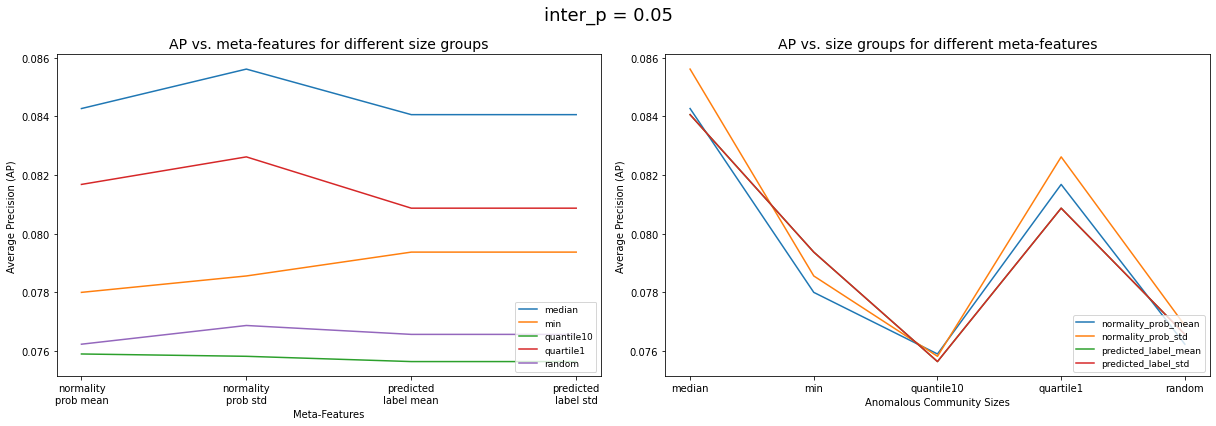

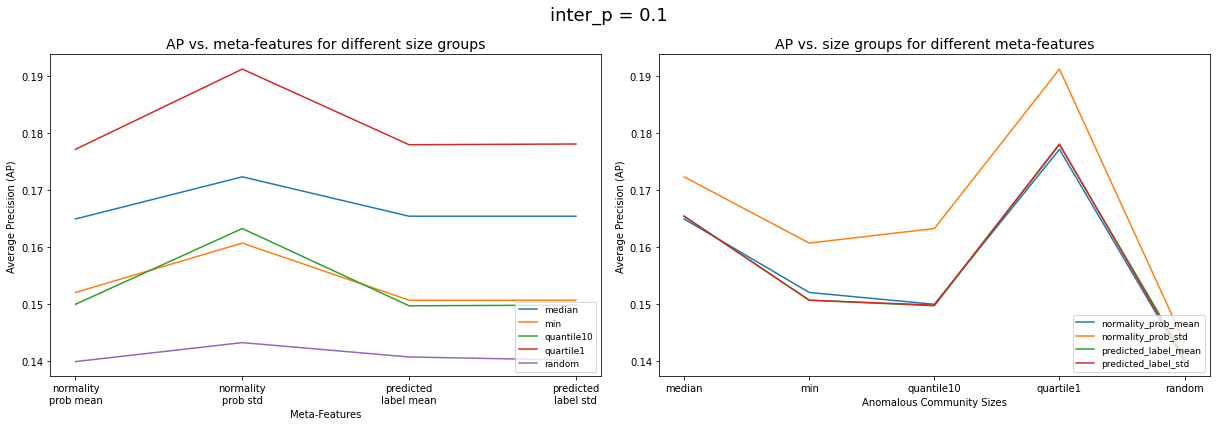

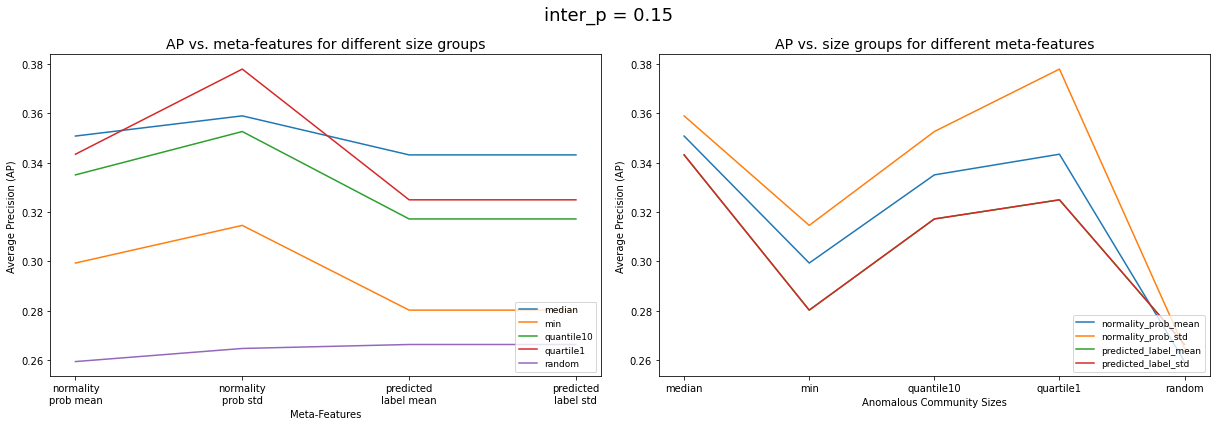

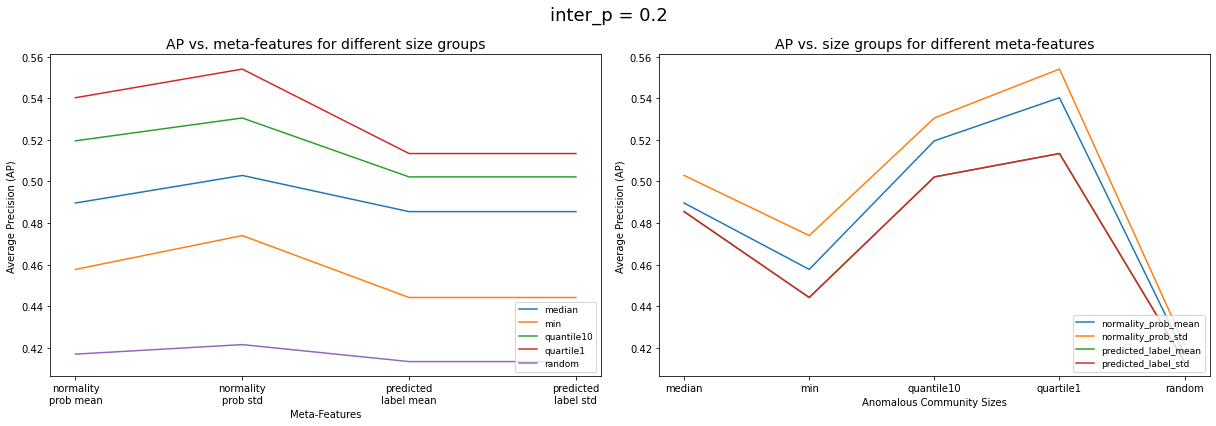

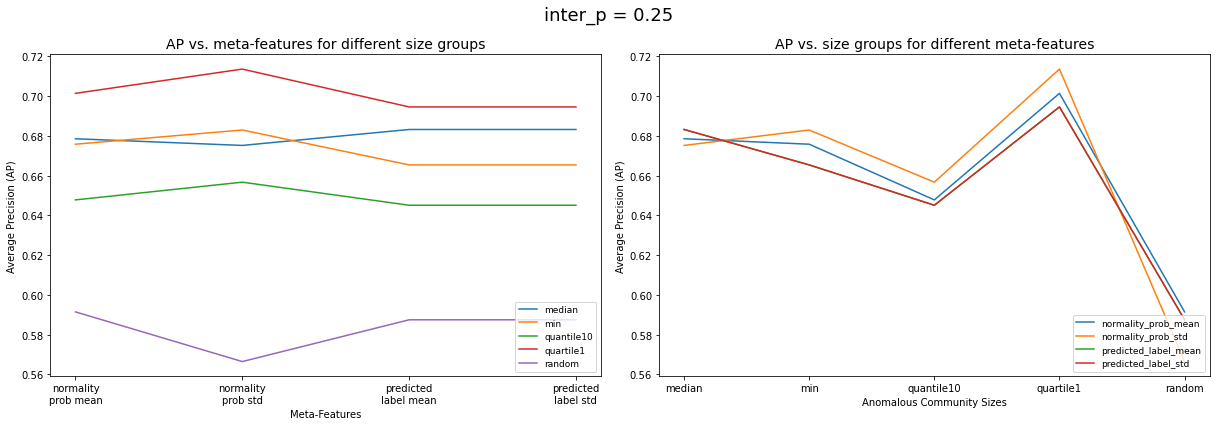

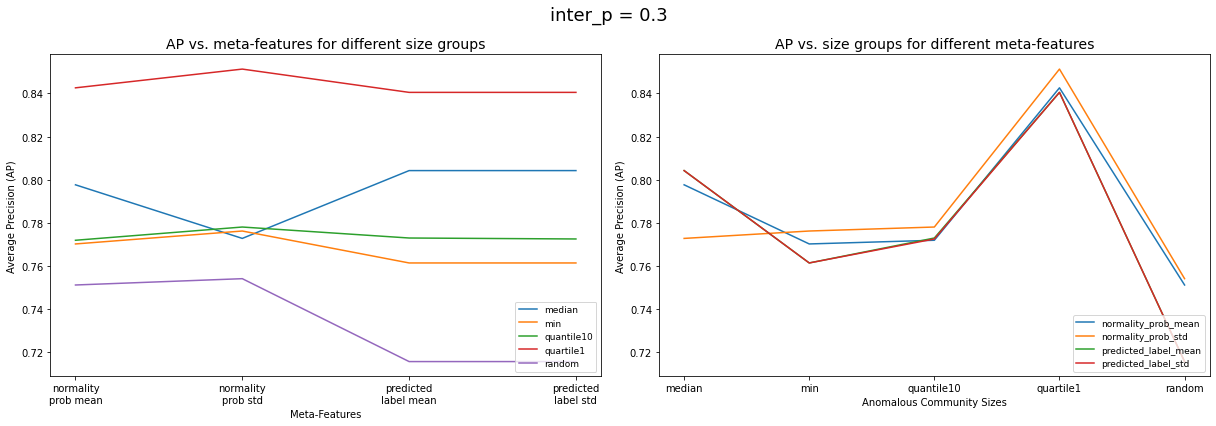

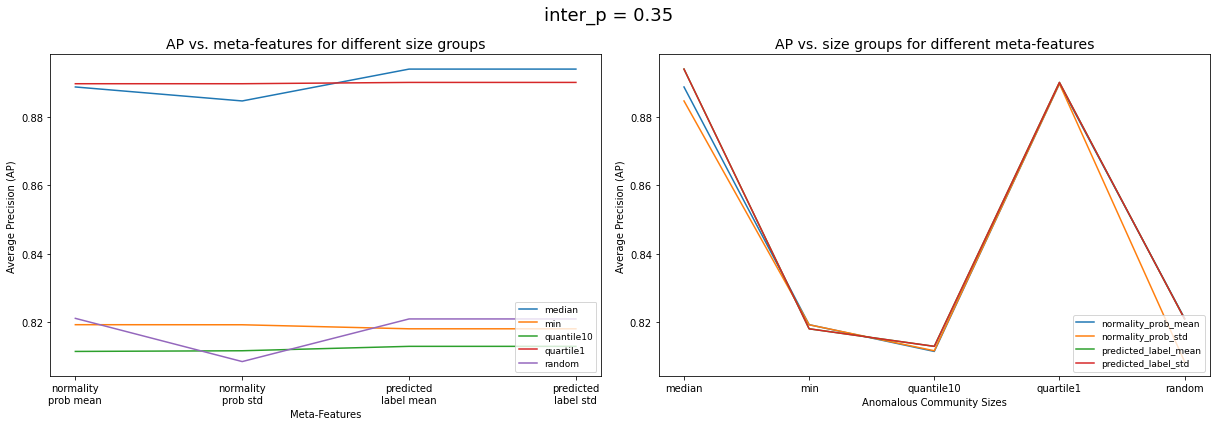

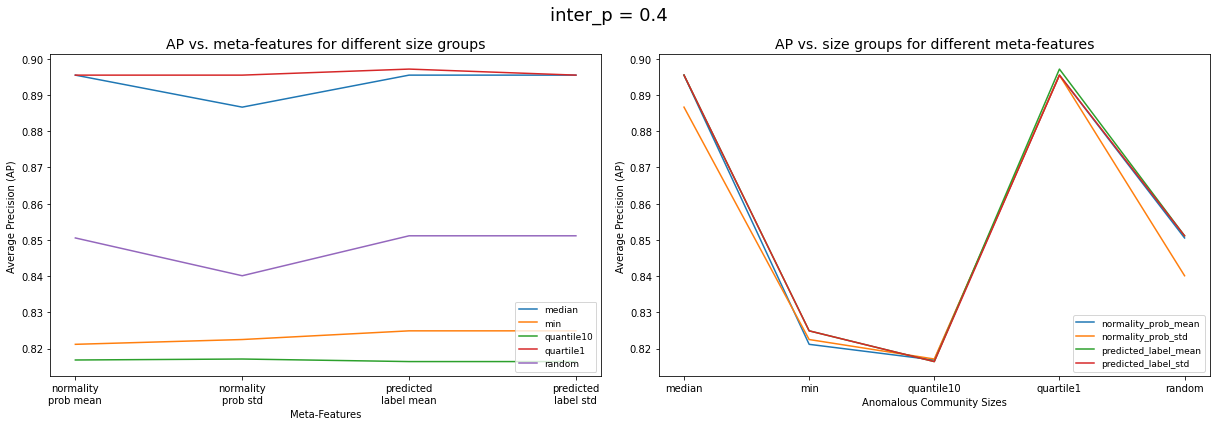

In [6]:
res_analyzer.plot_meta_features_comparison_grouped_by_ps_size_groups()

In [7]:
meta_features_comparison_df = res_analyzer.get_meta_features_comparison_df()
meta_features_comparison_df.head()

,normality_prob_mean,normality_prob_std,predicted_label_mean,predicted_label_std
anom_inter_p,,,,
0.050,0.079,0.080,0.079,0.079
0.100,0.157,0.166,0.157,0.157
0.150,0.318,0.334,0.306,0.306
0.200,0.485,0.497,0.472,0.472
0.250,0.659,0.659,0.655,0.655


In [8]:
meta_features_comparison_df.describe().loc[['mean', '50%','std']].rename({'50%': 'median'})

,normality_prob_mean,normality_prob_std,predicted_label_mean,predicted_label_std
mean,0.523,0.527,0.519,0.519
median,0.572,0.578,0.563,0.563
std,0.311,0.307,0.312,0.312


normality_prob_std is the best meta-feature

# Evaluate with different parameters 

## Anom_inter_p

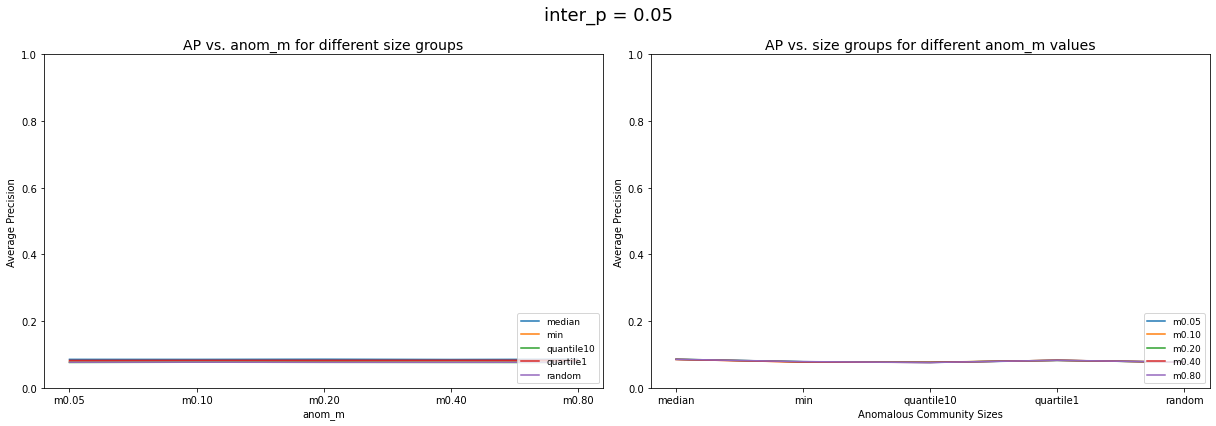

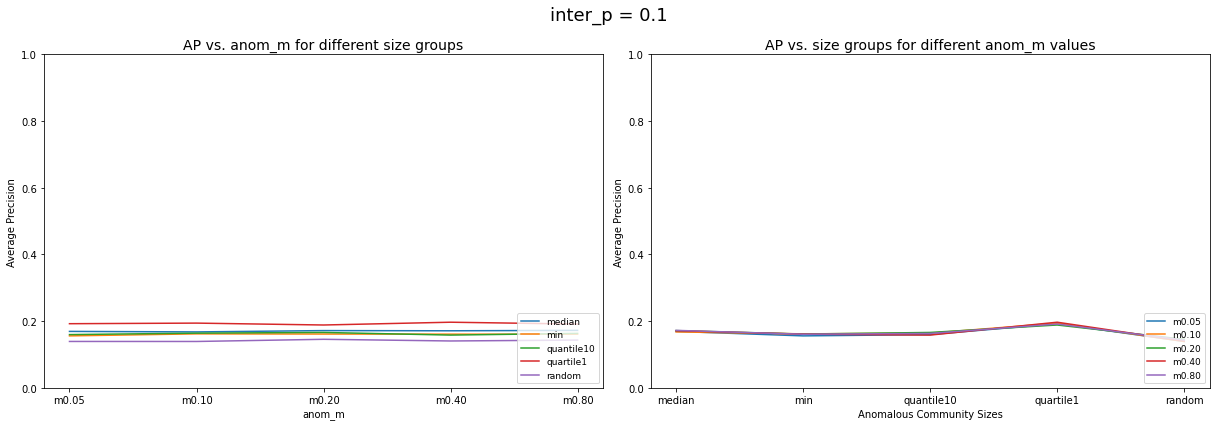

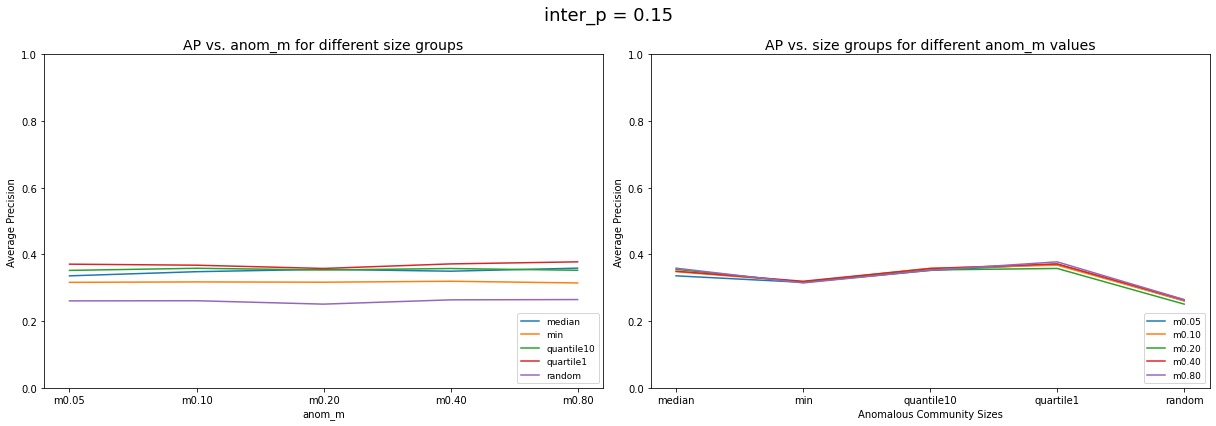

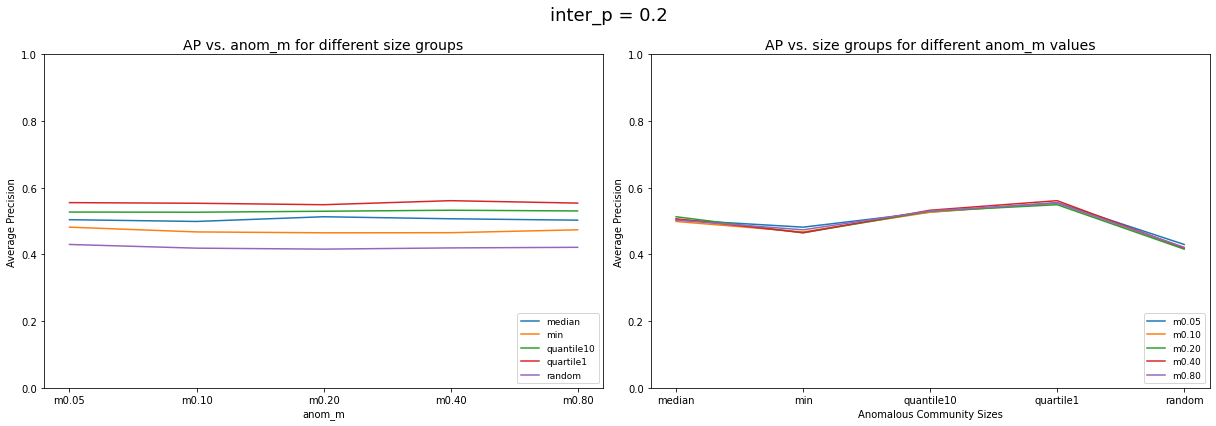

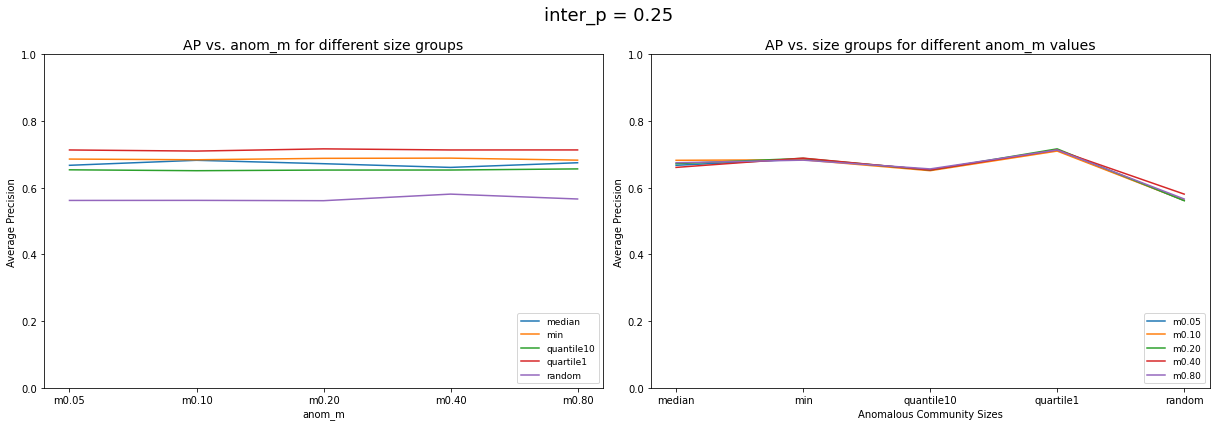

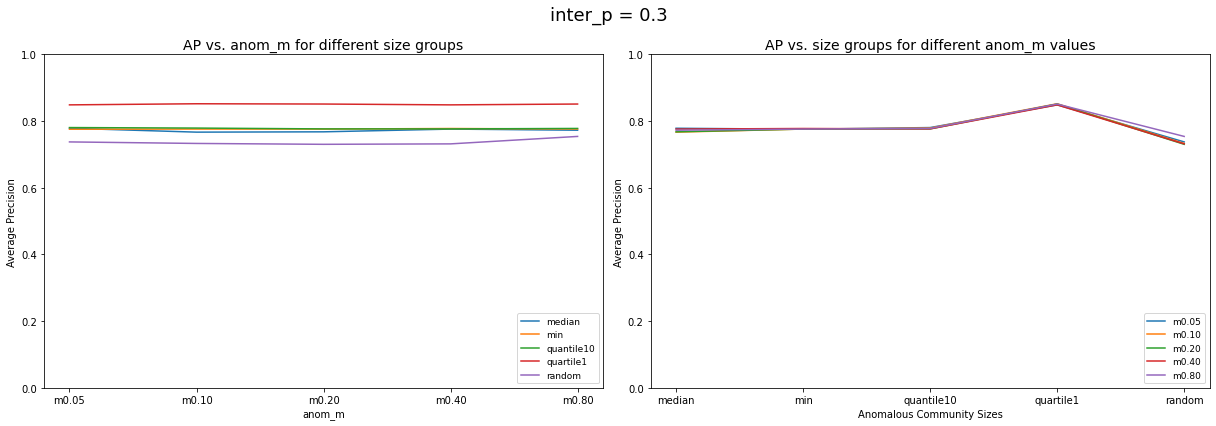

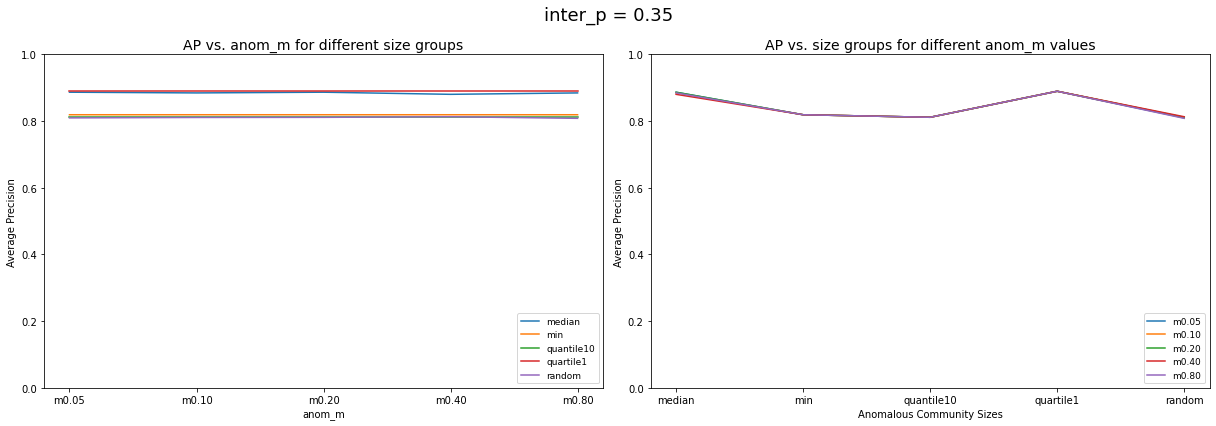

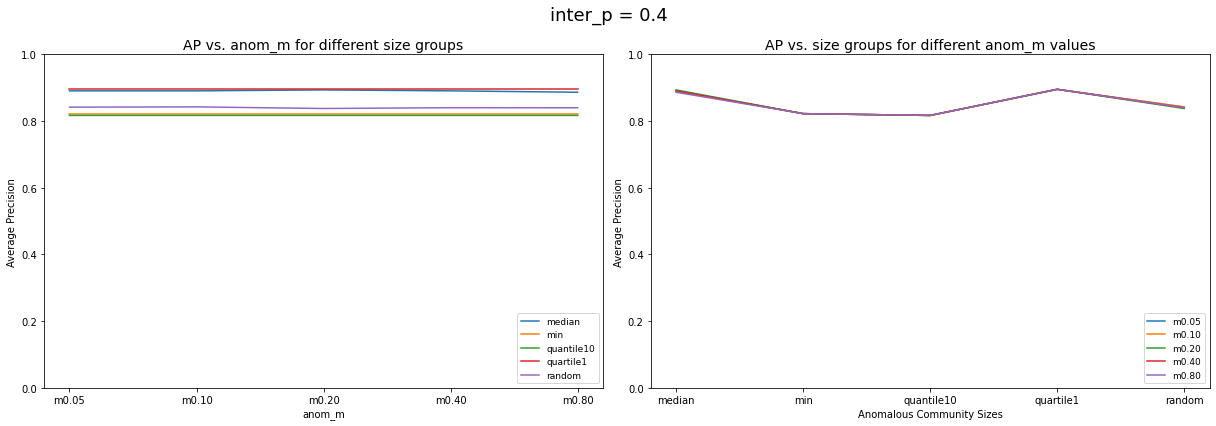

In [9]:
res_analyzer.plot_grouped_by_ps_ms_and_size_groups('normality_prob_std')

In [10]:
ps_comparison_df = res_analyzer.get_ps_comparison_df('normality_prob_std')
ps_comparison_df

,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4
size_group,,,,,,,,
min,0.078,0.160,0.317,0.471,0.686,0.776,0.819,0.822
quantile10,0.076,0.162,0.355,0.529,0.654,0.778,0.812,0.817
quartile1,0.082,0.193,0.369,0.555,0.714,0.850,0.890,0.895
median,0.085,0.170,0.350,0.505,0.672,0.772,0.885,0.891
random,0.077,0.141,0.260,0.421,0.567,0.737,0.811,0.841


In [11]:
ps_comparison_df.describe().loc[['mean', '50%','std']].rename({'50%': 'median'})

,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4
mean,0.080,0.165,0.330,0.496,0.658,0.783,0.843,0.853
median,0.078,0.162,0.350,0.505,0.672,0.776,0.819,0.841
std,0.004,0.019,0.044,0.052,0.056,0.041,0.040,0.037


## Anom_inter_m

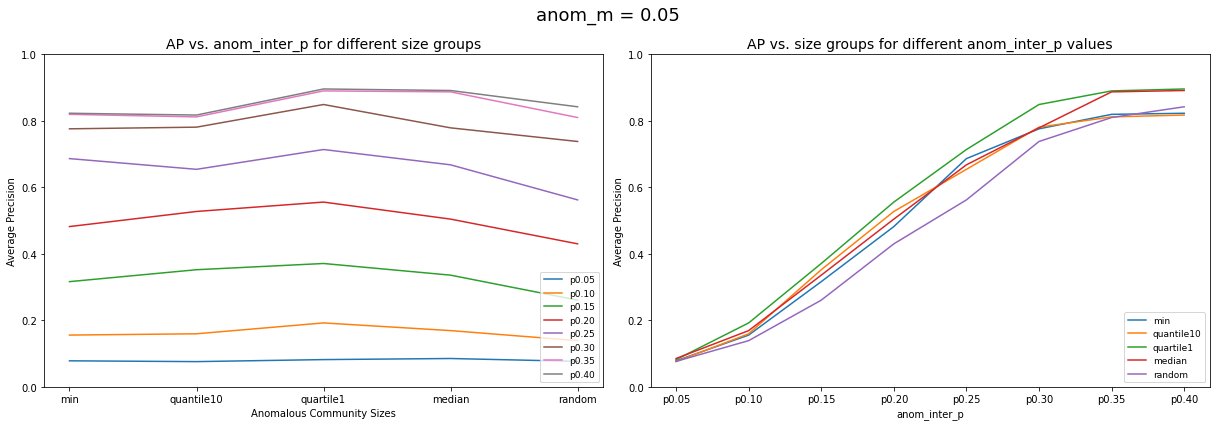

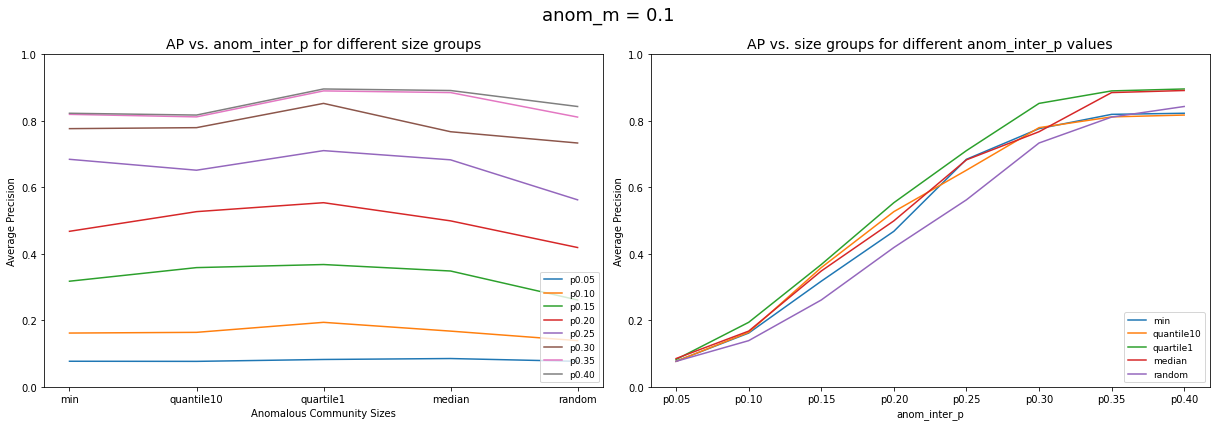

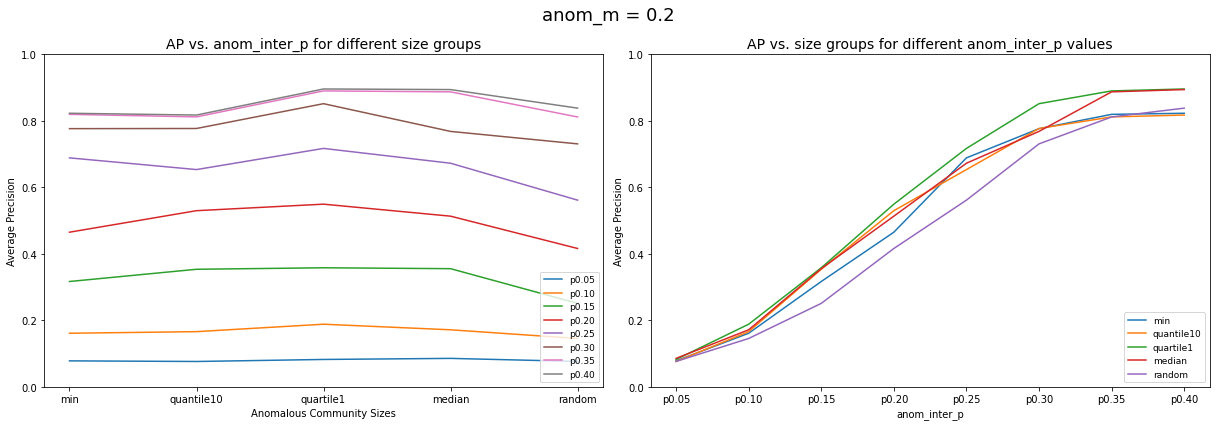

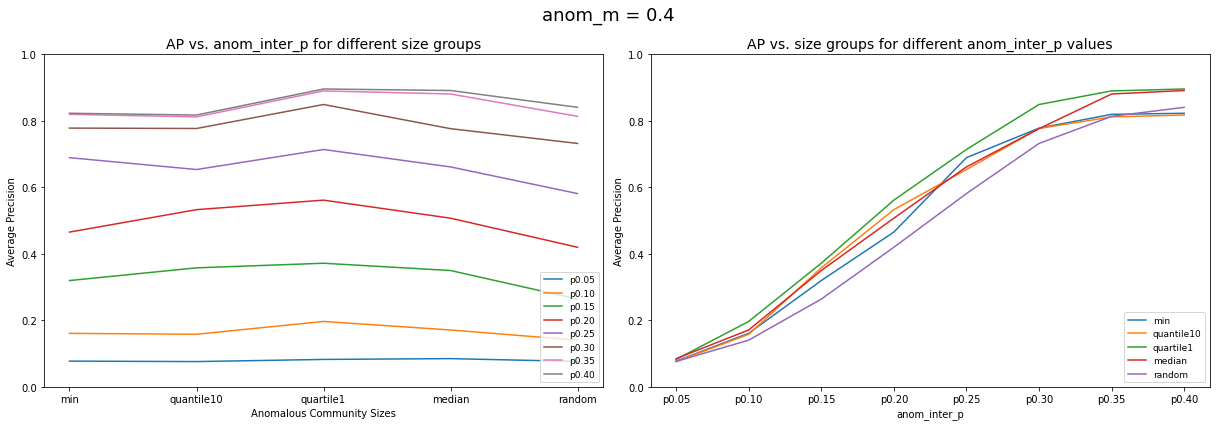

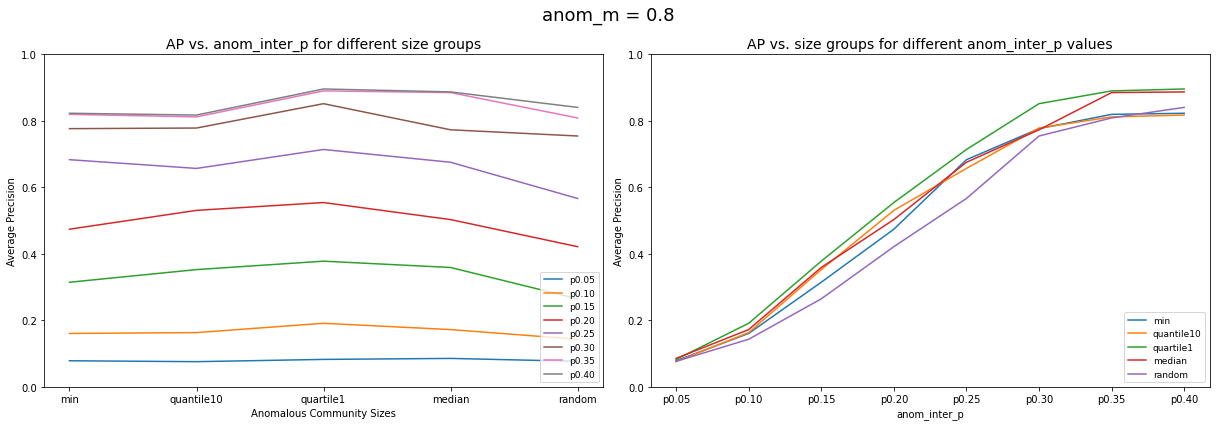

In [12]:
res_analyzer.plot_grouped_by_m_ps_and_size_groups('normality_prob_std')

In [13]:
ms_comparison_df = res_analyzer.get_ms_comparison_df('normality_prob_std')
ms_comparison_df

,0.05,0.1,0.2,0.4,0.8
anom_inter_p,,,,,
p0.05,0.080,0.080,0.080,0.080,0.080
p0.10,0.163,0.165,0.167,0.165,0.166
p0.15,0.327,0.331,0.327,0.333,0.334
p0.20,0.500,0.493,0.495,0.497,0.497
p0.25,0.657,0.658,0.658,0.660,0.659
p0.30,0.784,0.782,0.781,0.782,0.786
p0.35,0.843,0.843,0.844,0.843,0.843
p0.40,0.854,0.854,0.853,0.853,0.852


In [14]:
ms_comparison_df.describe().loc[['mean', '50%','std']].rename({'50%': 'median'})

,0.05,0.1,0.2,0.4,0.8
mean,0.526,0.526,0.525,0.527,0.527
median,0.578,0.576,0.577,0.578,0.578
std,0.308,0.307,0.307,0.307,0.307


## Size groups

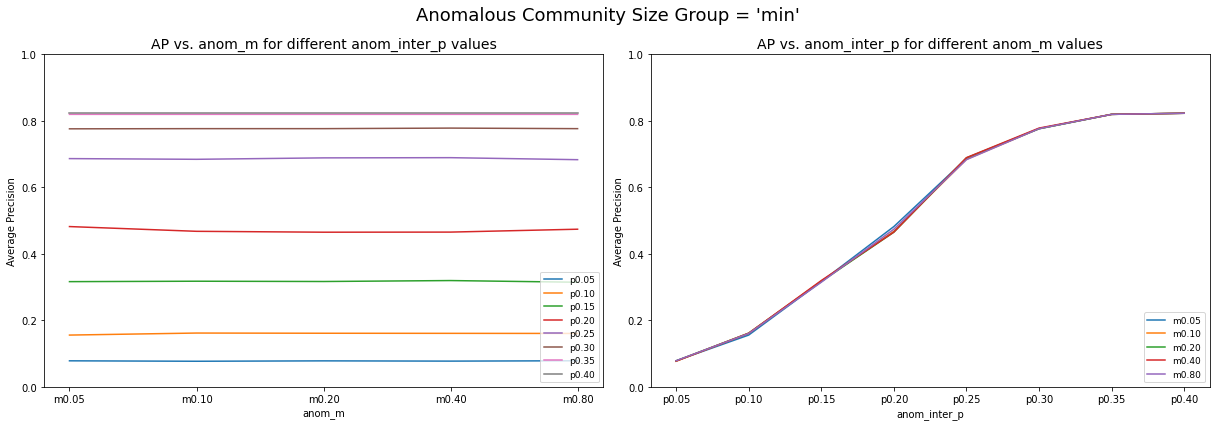

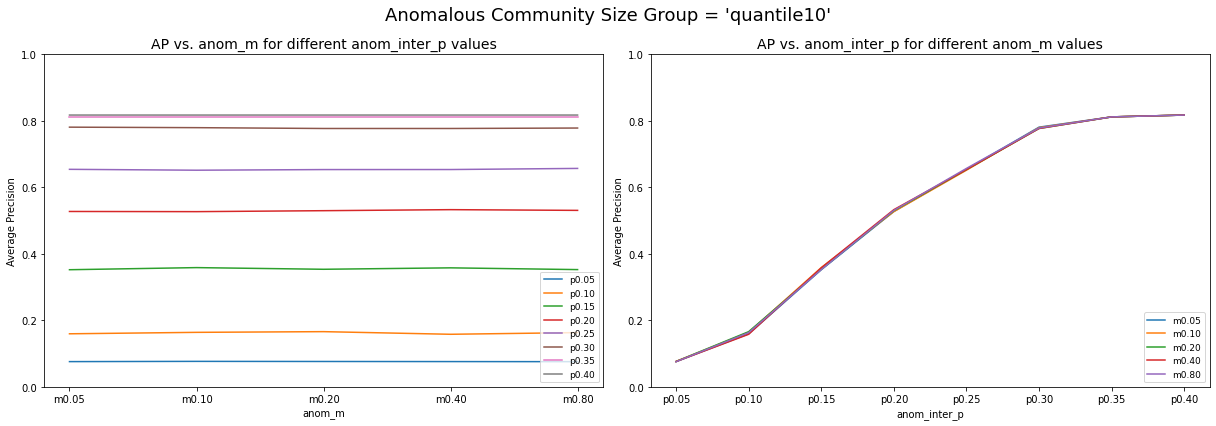

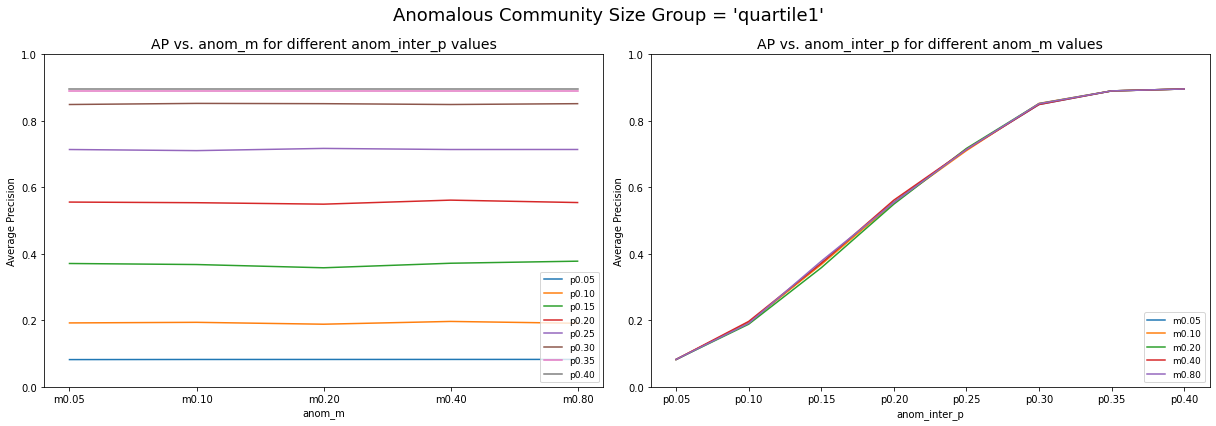

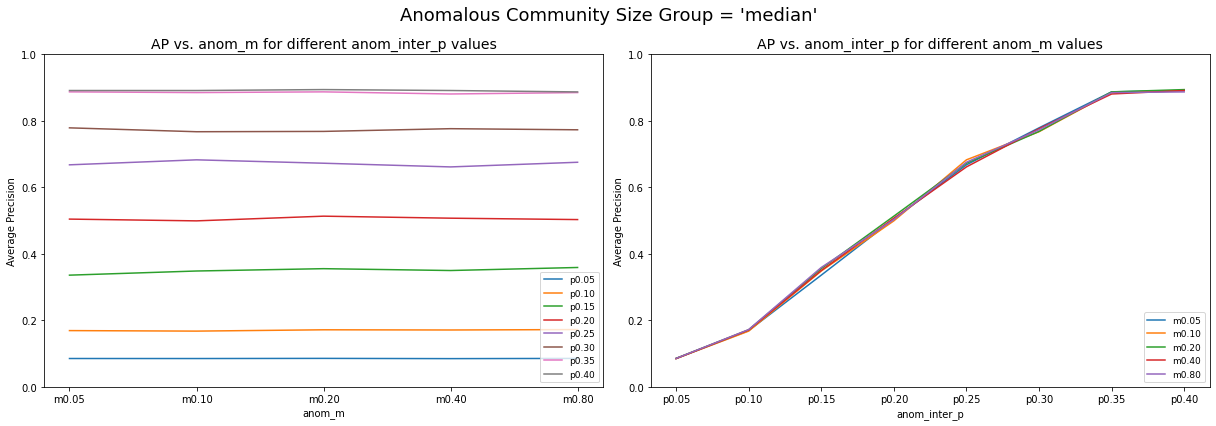

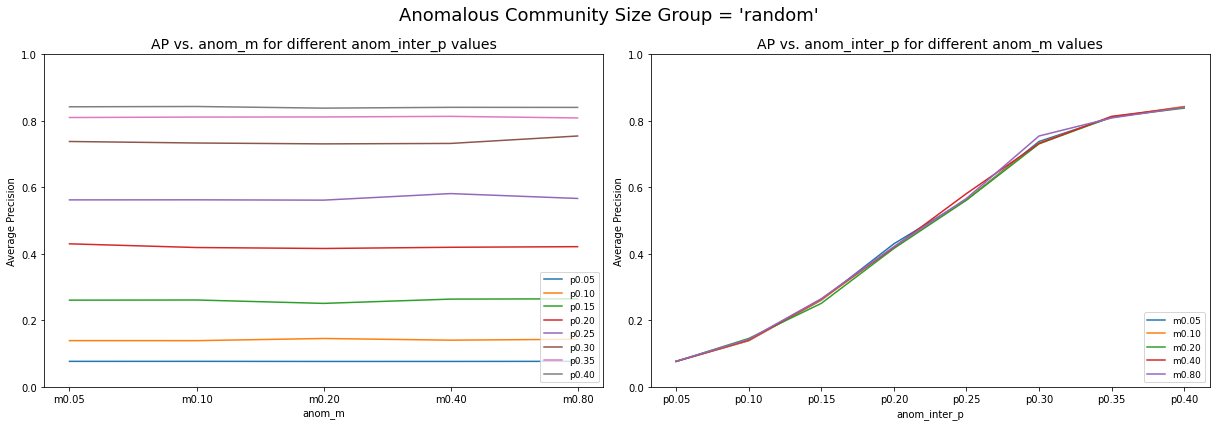

In [15]:
res_analyzer.plot_grouped_by_size_groups_ps_and_ms('normality_prob_std')

In [16]:
size_group_comparison_df = res_analyzer.get_size_groups_comparison_df('normality_prob_std')
size_group_comparison_df

,min,quantile10,quartile1,median,random
anom_m,,,,,
p0.05,0.078,0.076,0.082,0.085,0.077
p0.10,0.160,0.162,0.193,0.170,0.141
p0.15,0.317,0.355,0.369,0.350,0.260
p0.20,0.471,0.529,0.555,0.505,0.421
p0.25,0.686,0.654,0.714,0.672,0.567
p0.30,0.776,0.778,0.850,0.772,0.737
p0.35,0.819,0.812,0.890,0.885,0.811
p0.40,0.822,0.817,0.895,0.891,0.841


In [17]:
size_group_comparison_df.describe().loc[['mean', '50%','std']].rename({'50%': 'median'})

,min,quantile10,quartile1,median,random
mean,0.516,0.523,0.569,0.541,0.482
median,0.578,0.592,0.634,0.589,0.494
std,0.303,0.295,0.323,0.315,0.303
